py 36 env. Don't forget to set the API key in system env.

https://www.clarifai.com/developer/quick-start/

On Images https://clarifai-python.readthedocs.io/en/latest/basics/#image

On byte images https://stackoverflow.com/questions/31077366/pil-cannot-identify-image-file-for-io-bytesio-object

On 23-2-2018 clarifai==2.0.33

There is no reason to use the Clarifai python library, can use Curl https://www.clarifai.com/developer/guide/

In [1]:
from clarifai.rest import ClarifaiApp
#from clarifai.rest import Image as ClImage
import requests as rq
import os
import io
import base64
from PIL import Image
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import sys
print(sys.version)

def download_image(url, file_name):
    """"Convenience to download web image."""
    with open(file_name, "wb") as file:
        response = rq.get(url+file_name)
        file.write(response.content)
        print(file_name + " downloaded from " + url)
        
def list_files():
    """Convenience to list files in current directory."""
    return [f for f in os.listdir('.') if os.path.isfile(f)]


def load_api_secrets(filename):
    """Convenience to load the API key from a json file."""
    try:
        with open(filename, 'r') as fp:
            api_params = json.load(fp)
    except Exception as e:
        print('Failed to load API secrets key: {}'.format(e))
        api_params = None
    return api_params['key']

3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 12:04:33) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


## API key
https://clarifai-python.readthedocs.io/en/latest/install/#configuration

api_key can be passed to the constructor (https://clarifai-python.readthedocs.io/en/latest/clarifai.rest/#clarifai.rest.client.ClarifaiApp), or set as an environment variable. 


In [2]:
API_key_filepath = 'Clarifai_API_key.json'
API_key = load_api_secrets(API_key_filepath)
API_key

'123456'

To load from desktop

In [3]:
API_key_filepath = '/Users/robincole/Desktop/Clarifai_API_key.json'
API_key = load_api_secrets(API_key_filepath)
#API_key

In [4]:
app = ClarifaiApp(api_key=API_key)  # the constructor with api_key

#app = ClarifaiApp()  # the constructor with api_key as an environment variable

In [5]:
general_model = app.models.get('general-v1.3')

In [6]:
#Face Detection model
face_model = app.models.get('face-v1.3') # Get the face model

In [7]:
base_url = 'https://samples.clarifai.com/'

## Intro tutorial
Load a sample image and classify

In [8]:
#file_name = 'metro-north.jpg'
#download_image(base_url, file_name)

In [9]:
file_name = 'people.jpg'

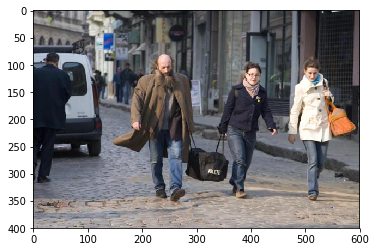

In [10]:
img = plt.imread(file_name)  # Creates an ndarray
plt.imshow(img)
plt.show()

In [11]:
byteImg = Image.open(file_name)  # JpegImageFile

In [12]:
byteImgIO = io.BytesIO()
byteImg.save(byteImgIO, "PNG")
byteImgIO.seek(0)
byteImg = byteImgIO.read()

In [13]:
# Image.open(io.BytesIO(byteImg))

Can predict from bytes

In [14]:
%%time
response = general_model.predict_by_bytes(byteImg)

CPU times: user 11.5 ms, sys: 4.01 ms, total: 15.5 ms
Wall time: 952 ms


In [15]:
concepts = response['outputs'][0]['data']['concepts']
for concept in concepts:
    print(concept['name'], concept['value'])

people 0.98939466
street 0.9779967
road 0.9671595
adult 0.96590316
city 0.9589045
woman 0.9546914
man 0.954421
pavement 0.9493658
wear 0.94721806
group 0.94381547
police 0.9378438
luggage 0.93781364
offense 0.91784954
portrait 0.8876148
vehicle 0.88213545
urban 0.8712872
child 0.86097276
two 0.86003673
drag race 0.840279
leader 0.8339366


In [16]:
data = response['outputs'][0]['data']['concepts']
classifications = {item['name']: item['value'] for item in data}
classifications

{'people': 0.98939466,
 'street': 0.9779967,
 'road': 0.9671595,
 'adult': 0.96590316,
 'city': 0.9589045,
 'woman': 0.9546914,
 'man': 0.954421,
 'pavement': 0.9493658,
 'wear': 0.94721806,
 'group': 0.94381547,
 'police': 0.9378438,
 'luggage': 0.93781364,
 'offense': 0.91784954,
 'portrait': 0.8876148,
 'vehicle': 0.88213545,
 'urban': 0.8712872,
 'child': 0.86097276,
 'two': 0.86003673,
 'drag race': 0.840279,
 'leader': 0.8339366}

Predict by filename, appears to be quicker

In [17]:
%%time
response = general_model.predict_by_filename(filename=file_name)

CPU times: user 10.3 ms, sys: 2.75 ms, total: 13.1 ms
Wall time: 582 ms


In [18]:
concepts = response['outputs'][0]['data']['concepts']
for concept in concepts:
    print(concept['name'], concept['value'])

people 0.9895545
street 0.9783188
adult 0.96886206
road 0.9680086
city 0.9606942
woman 0.9562485
man 0.9555297
pavement 0.9535717
wear 0.9484811
group 0.94383585
luggage 0.943045
police 0.9337296
offense 0.91940653
portrait 0.89796615
vehicle 0.8807571
urban 0.8696754
two 0.8653339
child 0.8546326
drag race 0.8324915
leader 0.83127177


### Local image & face detection
Load a local image https://clarifai-python.readthedocs.io/en/latest/tutorial/#instantiate-an-image

Face detection https://clarifai-python.readthedocs.io/en/latest/tutorial-feedback/#face-detection-model-prediction

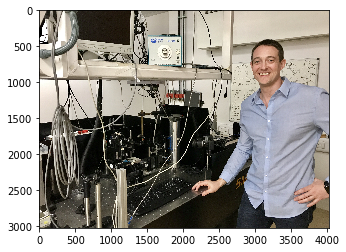

In [19]:
photos_path = '/Users/robincole/Documents/Data/photos/'
file_name = 'Robin_lab.JPG'
img = plt.imread(photos_path + file_name)
plt.imshow(img)
plt.show()

In [20]:
%%time
response = face_model.predict_by_filename(filename= photos_path + file_name)

CPU times: user 39.8 ms, sys: 29.6 ms, total: 69.4 ms
Wall time: 4.51 s


In [21]:
bounding_box = response['outputs'][0]['data']['regions'][0]['region_info']['bounding_box']
bounding_box

{'top_row': 0.18916923,
 'left_col': 0.72670805,
 'bottom_row': 0.3288591,
 'right_col': 0.8314986}

In [22]:
bounding_box['bottom_row']

0.3288591

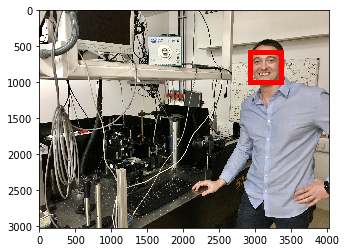

In [23]:
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(img)

# Get the image rows and cols
img_rows = img.shape[0]
img_cols = img.shape[1]

x_orig = int(bounding_box['left_col']*img_cols)
y_orig = int(bounding_box['bottom_row']*img_rows)
width = int(bounding_box['right_col']*img_cols) - x_orig
height = int(bounding_box['top_row']*img_rows) - y_orig

rect = patches.Rectangle((x_orig,y_orig),width,height,linewidth=5,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)
plt.savefig('face_identified.png')
plt.show()